## Random Forest

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

# RF
from sklearn.ensemble import RandomForestClassifier

In [124]:
training = pd.read_csv('test/training-person2.csv').fillna(0)
test = pd.read_csv('test/test-person2.csv').fillna(0)
sumbit = test['person'].to_frame()

In [125]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.1

In [126]:
y = training['label']
X = training.drop(axis=1, labels=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [127]:
X.columns

Index(['event', 'model', 'count_top_viewed_product', 'new_vs_returning',
       'last_event_days', 'first_event_days', 'events_cout_last_week',
       'events_mean_frec_last_week', 'searched_model',
       'count_top_searched_model'],
      dtype='object')

In [128]:
rdf = RandomForestClassifier(
    min_samples_split=5,
    criterion = 'entropy',
    random_state=RANDOM_SEED,
    n_estimators=100
)

In [142]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, scoring='roc_auc', param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=410, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV] n_estimators=410, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=410, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=  34.6s
[CV] n_estimators=410, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=410, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=  36.9s
[CV] n_estimators=621, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=410, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=  35.2s
[CV] n_estimators=621, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1

[CV] n_estimators=873, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=873, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total= 1.0min
[CV] n_estimators=873, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=873, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total= 1.1min
[CV] n_estimators=326, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=326, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  34.7s
[CV] n_estimators=326, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=873, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total= 1.5min
[CV] n_estimators=326, min_samp

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.6min


[CV]  n_estimators=326, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  37.8s
[CV] n_estimators=578, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=326, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  33.5s
[CV] n_estimators=578, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=578, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total= 1.3min
[CV] n_estimators=578, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=578, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total= 1.5min
[CV] n_estimators=494, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=578, min_sa

[CV]  n_estimators=368, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=  23.5s
[CV] n_estimators=915, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=915, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True, total=  55.1s
[CV] n_estimators=915, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=915, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True, total=  59.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=  17.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=200, min

[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, total=  13.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, total=  12.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, total=  12.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 1.5min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimato

[CV]  n_estimators=494, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total=  42.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True, total=  11.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True, total=  11.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=494, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total=  43.6s
[CV] n_estimators=284, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=200, min_samp

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 66.7min


[CV]  n_estimators=368, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True, total=  21.0s
[CV] n_estimators=326, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=326, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=  27.7s
[CV] n_estimators=326, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=326, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=  27.8s
[CV] n_estimators=915, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=326, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=  27.8s
[CV] n_estimators=915, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=915, min

[CV]  n_estimators=368, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=  20.0s
[CV] n_estimators=368, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=368, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=  20.6s
[CV] n_estimators=368, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=368, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=  20.4s
[CV] n_estimators=368, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=368, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=  31.8s
[CV] n_estimators=368, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=368, 

[CV]  n_estimators=915, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total= 1.2min
[CV] n_estimators=578, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=578, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=  44.9s
[CV] n_estimators=578, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=915, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total= 1.3min
[CV] n_estimators=578, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=578, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=  48.5s
[CV] n_estimators=326, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=578, min_

[CV]  n_estimators=452, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, total=  26.5s
[CV] n_estimators=705, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=705, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=  39.5s
[CV] n_estimators=705, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=705, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=  39.8s
[CV] n_estimators=410, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=410, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=  22.2s
[CV] n_estimators=410, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=705, min_samp

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.4min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.4min
[CV] n_estimators=494, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=494, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=  24.9s
[CV] n_estimators=494, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=494, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=  25.4s
[CV] n_estimators=494, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=1000, mi

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 117.3min finished


{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [129]:
# Training
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [130]:
# Predict value
ret = rdf.predict_proba(X_test)

In [131]:
y_test_predictd = rdf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.6719778666343552

In [132]:
rdf.score(X_test, y_test)

0.9443872296601442

In [133]:
# Predict value kaggle set
# Training
rdf.fit(X, y)
ret = rdf.predict_proba(test.drop(axis=1, labels=['person']))

In [134]:
# Get proba
sumbit['label'] = pd.DataFrame(ret)[1]

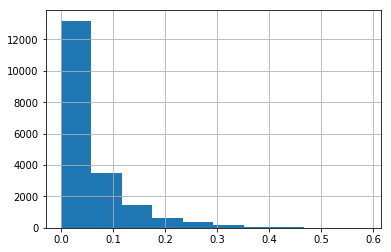

In [135]:
g = (sumbit['label']).hist()

In [136]:
# Get numerical feature importances
importances = list(rdf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: model                Importance: 0.1719889
Variable: searched_model       Importance: 0.1632352
Variable: first_event_days     Importance: 0.1338563
Variable: event                Importance: 0.1294765
Variable: last_event_days      Importance: 0.1013138
Variable: count_top_viewed_product Importance: 0.0972136
Variable: events_cout_last_week Importance: 0.0828322
Variable: events_mean_frec_last_week Importance: 0.0705554
Variable: count_top_searched_model Importance: 0.0380228
Variable: new_vs_returning     Importance: 0.0115052


In [137]:
#sumbit.to_csv('test/sumbit-2.csv', index=False)

In [138]:
training.head()

,event,model,count_top_viewed_product,new_vs_returning,last_event_days,first_event_days,events_cout_last_week,events_mean_frec_last_week,searched_model,count_top_searched_model,label
0,65,0.057153,17.0,1.0,9.0,17.0,7.0,9.000000,0.050620,0.0,0
1,25,0.045436,7.0,1.0,10.0,14.0,0.0,0.000000,0.050629,0.0,0
2,53,0.036599,11.0,1.0,10.0,13.0,0.0,0.000000,0.084709,6.0,0
3,20,0.054600,5.0,0.0,13.0,13.0,0.0,0.000000,0.050605,0.0,0
4,819,0.059213,56.0,1.0,2.0,58.0,44.0,6.090909,0.050535,0.0,0
